# Explore convection on a 4x4 grid 
### with 25% coverage of updrafts 

Fields b and w might be continuous, although we rank-sort w to have exactly 4 discrete Boolean updrafts. Those can have 16 choose 4 configurations. Many of these are redundant. Explore this redundancy using fft2 (spatial symmetries of transposition and rotation). How big is configuration space, what KE is implied by each, etc. Is there an adjacency function of configuration space, and a function on that space for efficiency (fitness) ? 


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [144]:
def tileplot(arr,N=2, **kwargs): 
    plt.figure( figsize=(2,2))
    plt.pcolormesh( np.tile(arr, (N, N)), cmap='RdBu_r', shading='nearest', \
                    vmin=-np.max(np.abs(arr)),vmax=np.max(np.abs(arr)), **kwargs);
    
def tilecon(arr,N=2, NLEV=23, **kwargs): 
    plt.contourf( np.tile(arr, (N, N)), cmap='RdBu_r',levels=NLEV, **kwargs);
    
def tilequiv(u,v,N=2, **kwargs): 
    plt.quiver( np.tile(u, (N, N)), np.tile(v, (N, N)), **kwargs);

In [225]:
NX = 6 # Size of convection field 
NCELLS = 13

b = np.zeros((NX,NX))
w = np.zeros((NX,NX))

w.ravel()[np.random.choice(NX*NX, NCELLS, replace=False)] = 1

In [226]:
# Fourier transform of divergence = w so streamfunction can be made 

what = np.fft.fft2(w-np.mean(w))  # Subtract the mean 
ky, kx = np.fft.fftfreq(w.shape[0]), np.fft.fftfreq(w.shape[1])
ky2,kx2 = np.meshgrid(ky, kx, indexing='ij')
kk2 = np.sqrt(kx2**2 + ky2**2)

Chi = np.fft.fft2 (what / (kk2+1e-9)) # Division by zero avoided, only occurs for what=0

Chi = np.roll( np.flipud( np.fliplr(Chi)) ,(1,1),axis=(0,1))  # Graphical fix! Kangfirmed!

# Adjust the boundaries for periodicity and compute gradient, then trim it 
Chi_padded = np.pad(Chi.real, ((1, 1), (1, 1)), mode='wrap')
grad_x, grad_y = np.gradient(Chi_padded)
v = grad_x[1:-1, 1:-1]
u = grad_y[1:-1, 1:-1]

# KE once we trust it 
KE = (u**2 + v**2)/2

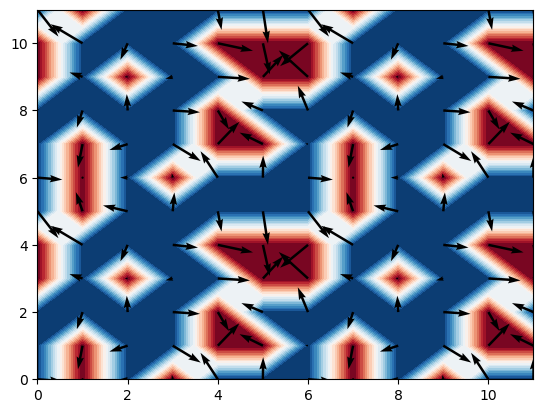

In [230]:
tilecon(w,2); tilequiv( u,v,2 ) 

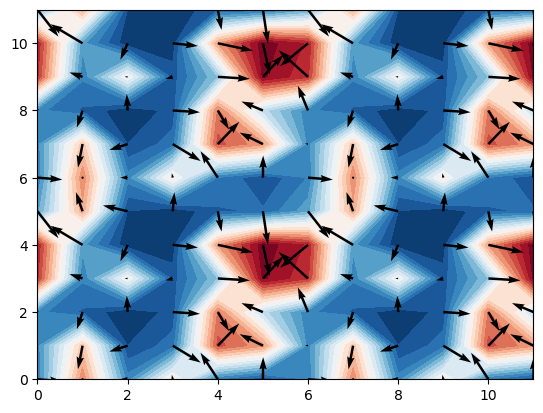

In [231]:
tilecon(Chi.real,2); tilequiv( u,v,2 ) 